In [1]:
import pandas as pd

# Readings csv
df = pd.read_csv("Aggregated_data.csv")

df

,Unnamed: 0,Year,School,Conf,Recruit_Val,5 Stars,4 Stars,3 Stars,Total Commits,AVG NIL,Post_NIL,Coach Pay,Revenue,stadium_capacity
0,0,2017,Alabama,SEC,94.656250,7,17,4,28,32000.0,0,10000000.0,214365357.0,101821
1,1,2018,Alabama,SEC,33.454545,2,12,5,21,32000.0,0,10000000.0,214365357.0,101821
2,2,2019,Alabama,SEC,56.468750,3,23,1,27,45000.0,0,10000000.0,214365357.0,101821
3,3,2020,Alabama,SEC,61.875000,4,17,4,25,74000.0,0,10000000.0,214365357.0,101821
4,4,2021,Alabama,SEC,75.781250,5,20,2,27,156000.0,1,10000000.0,214365357.0,101821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,2022,Houston,Big 12,1.000000,0,1,17,21,41000.0,1,4500000.0,78088086.0,40000
395,395,2023,Kansas State,Big 12,1.000000,0,1,25,27,122000.0,1,5250000.0,100822204.0,50000
396,396,2024,Kansas State,Big 12,1.000000,0,1,15,16,30000.0,1,5250000.0,100822204.0,50000
397,397,2024,Kansas,Big 12,3.000000,0,3,14,17,36000.0,1,7500000.0,118020175.0,50071


In [2]:
# dropping unnamed column 
df = df.drop('Unnamed: 0', axis=1)
df

,Year,School,Conf,Recruit_Val,5 Stars,4 Stars,3 Stars,Total Commits,AVG NIL,Post_NIL,Coach Pay,Revenue,stadium_capacity
0,2017,Alabama,SEC,94.656250,7,17,4,28,32000.0,0,10000000.0,214365357.0,101821
1,2018,Alabama,SEC,33.454545,2,12,5,21,32000.0,0,10000000.0,214365357.0,101821
2,2019,Alabama,SEC,56.468750,3,23,1,27,45000.0,0,10000000.0,214365357.0,101821
3,2020,Alabama,SEC,61.875000,4,17,4,25,74000.0,0,10000000.0,214365357.0,101821
4,2021,Alabama,SEC,75.781250,5,20,2,27,156000.0,1,10000000.0,214365357.0,101821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2022,Houston,Big 12,1.000000,0,1,17,21,41000.0,1,4500000.0,78088086.0,40000
395,2023,Kansas State,Big 12,1.000000,0,1,25,27,122000.0,1,5250000.0,100822204.0,50000
396,2024,Kansas State,Big 12,1.000000,0,1,15,16,30000.0,1,5250000.0,100822204.0,50000
397,2024,Kansas,Big 12,3.000000,0,3,14,17,36000.0,1,7500000.0,118020175.0,50071


In [3]:
# turning into json to feed to LLM 

json_str = df.to_json(orient='records', indent=2)
print(json_str)

[
  {
    "Year":2017,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":94.65625,
    "5 Stars":7,
    "4 Stars":17,
    "3 Stars":4,
    "Total Commits":28,
    "AVG NIL":32000.0,
    "Post_NIL":0,
    "Coach Pay":10000000.0,
    "Revenue":214365357.0,
    "stadium_capacity":101821
  },
  {
    "Year":2018,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":33.4545454545,
    "5 Stars":2,
    "4 Stars":12,
    "3 Stars":5,
    "Total Commits":21,
    "AVG NIL":32000.0,
    "Post_NIL":0,
    "Coach Pay":10000000.0,
    "Revenue":214365357.0,
    "stadium_capacity":101821
  },
  {
    "Year":2019,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":56.46875,
    "5 Stars":3,
    "4 Stars":23,
    "3 Stars":1,
    "Total Commits":27,
    "AVG NIL":45000.0,
    "Post_NIL":0,
    "Coach Pay":10000000.0,
    "Revenue":214365357.0,
    "stadium_capacity":101821
  },
  {
    "Year":2020,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":61.875,
    "5 Sta

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_preNIL_recruit_val(df):
    """
    This function takes a DataFrame containing your recruiting data,
    filters it for pre-NIL observations (Post_NIL == 0), calculates the average
    recruiting value (Recruit_Val) for each school, and plots both a bar chart and 
    a histogram of these averages.
    
    Parameters:
        df (pd.DataFrame): The full dataset with a 'Post_NIL' column and a 'Recruit_Val' column.
    
    Returns:
        avg_recruit (pd.DataFrame): A DataFrame with the average Recruit_Val per school.
    """
    # Filter for pre-NIL data
    pre_df = df[df['Post_NIL'] == 0]
    
    # Group by School and compute the average recruiting value
    avg_recruit = pre_df.groupby('School')['Recruit_Val'].mean().reset_index()
    
    # Sort the results by average recruiting value (highest first)
    avg_recruit = avg_recruit.sort_values(by='Recruit_Val', ascending=False)
    
    # Create a figure with two subplots: one for the bar chart, one for the histogram
    fig, axes = plt.subplots(1, 2, figsize=(24, 16))
    
    # Bar chart of average recruiting value by school
    axes[0].bar(avg_recruit['School'], avg_recruit['Recruit_Val'], color='skyblue')
    axes[0].set_xlabel("School")
    axes[0].set_ylabel("Average Recruit_Val (Pre-NIL)")
    axes[0].set_title("Average Recruiting Value by School (Pre-NIL)")
    axes[0].tick_params(axis='x', rotation=90)
    
    # Histogram of the average recruiting values
    axes[1].hist(avg_recruit['Recruit_Val'], bins=10, edgecolor='k', color='salmon')
    axes[1].set_xlabel("Average Recruit_Val (Pre-NIL)")
    axes[1].set_ylabel("Number of Schools")
    axes[1].set_title("Distribution of Average Recruiting Values (Pre-NIL)")
    
    plt.tight_layout()
    plt.show()
    
    return avg_recruit

# Example usage:
# Assuming your DataFrame is called 'df':
# avg_recruit_df = plot_preNIL_recruit_val(df)
# You can then inspect avg_recruit_df to see the numbers and decide on a threshold.


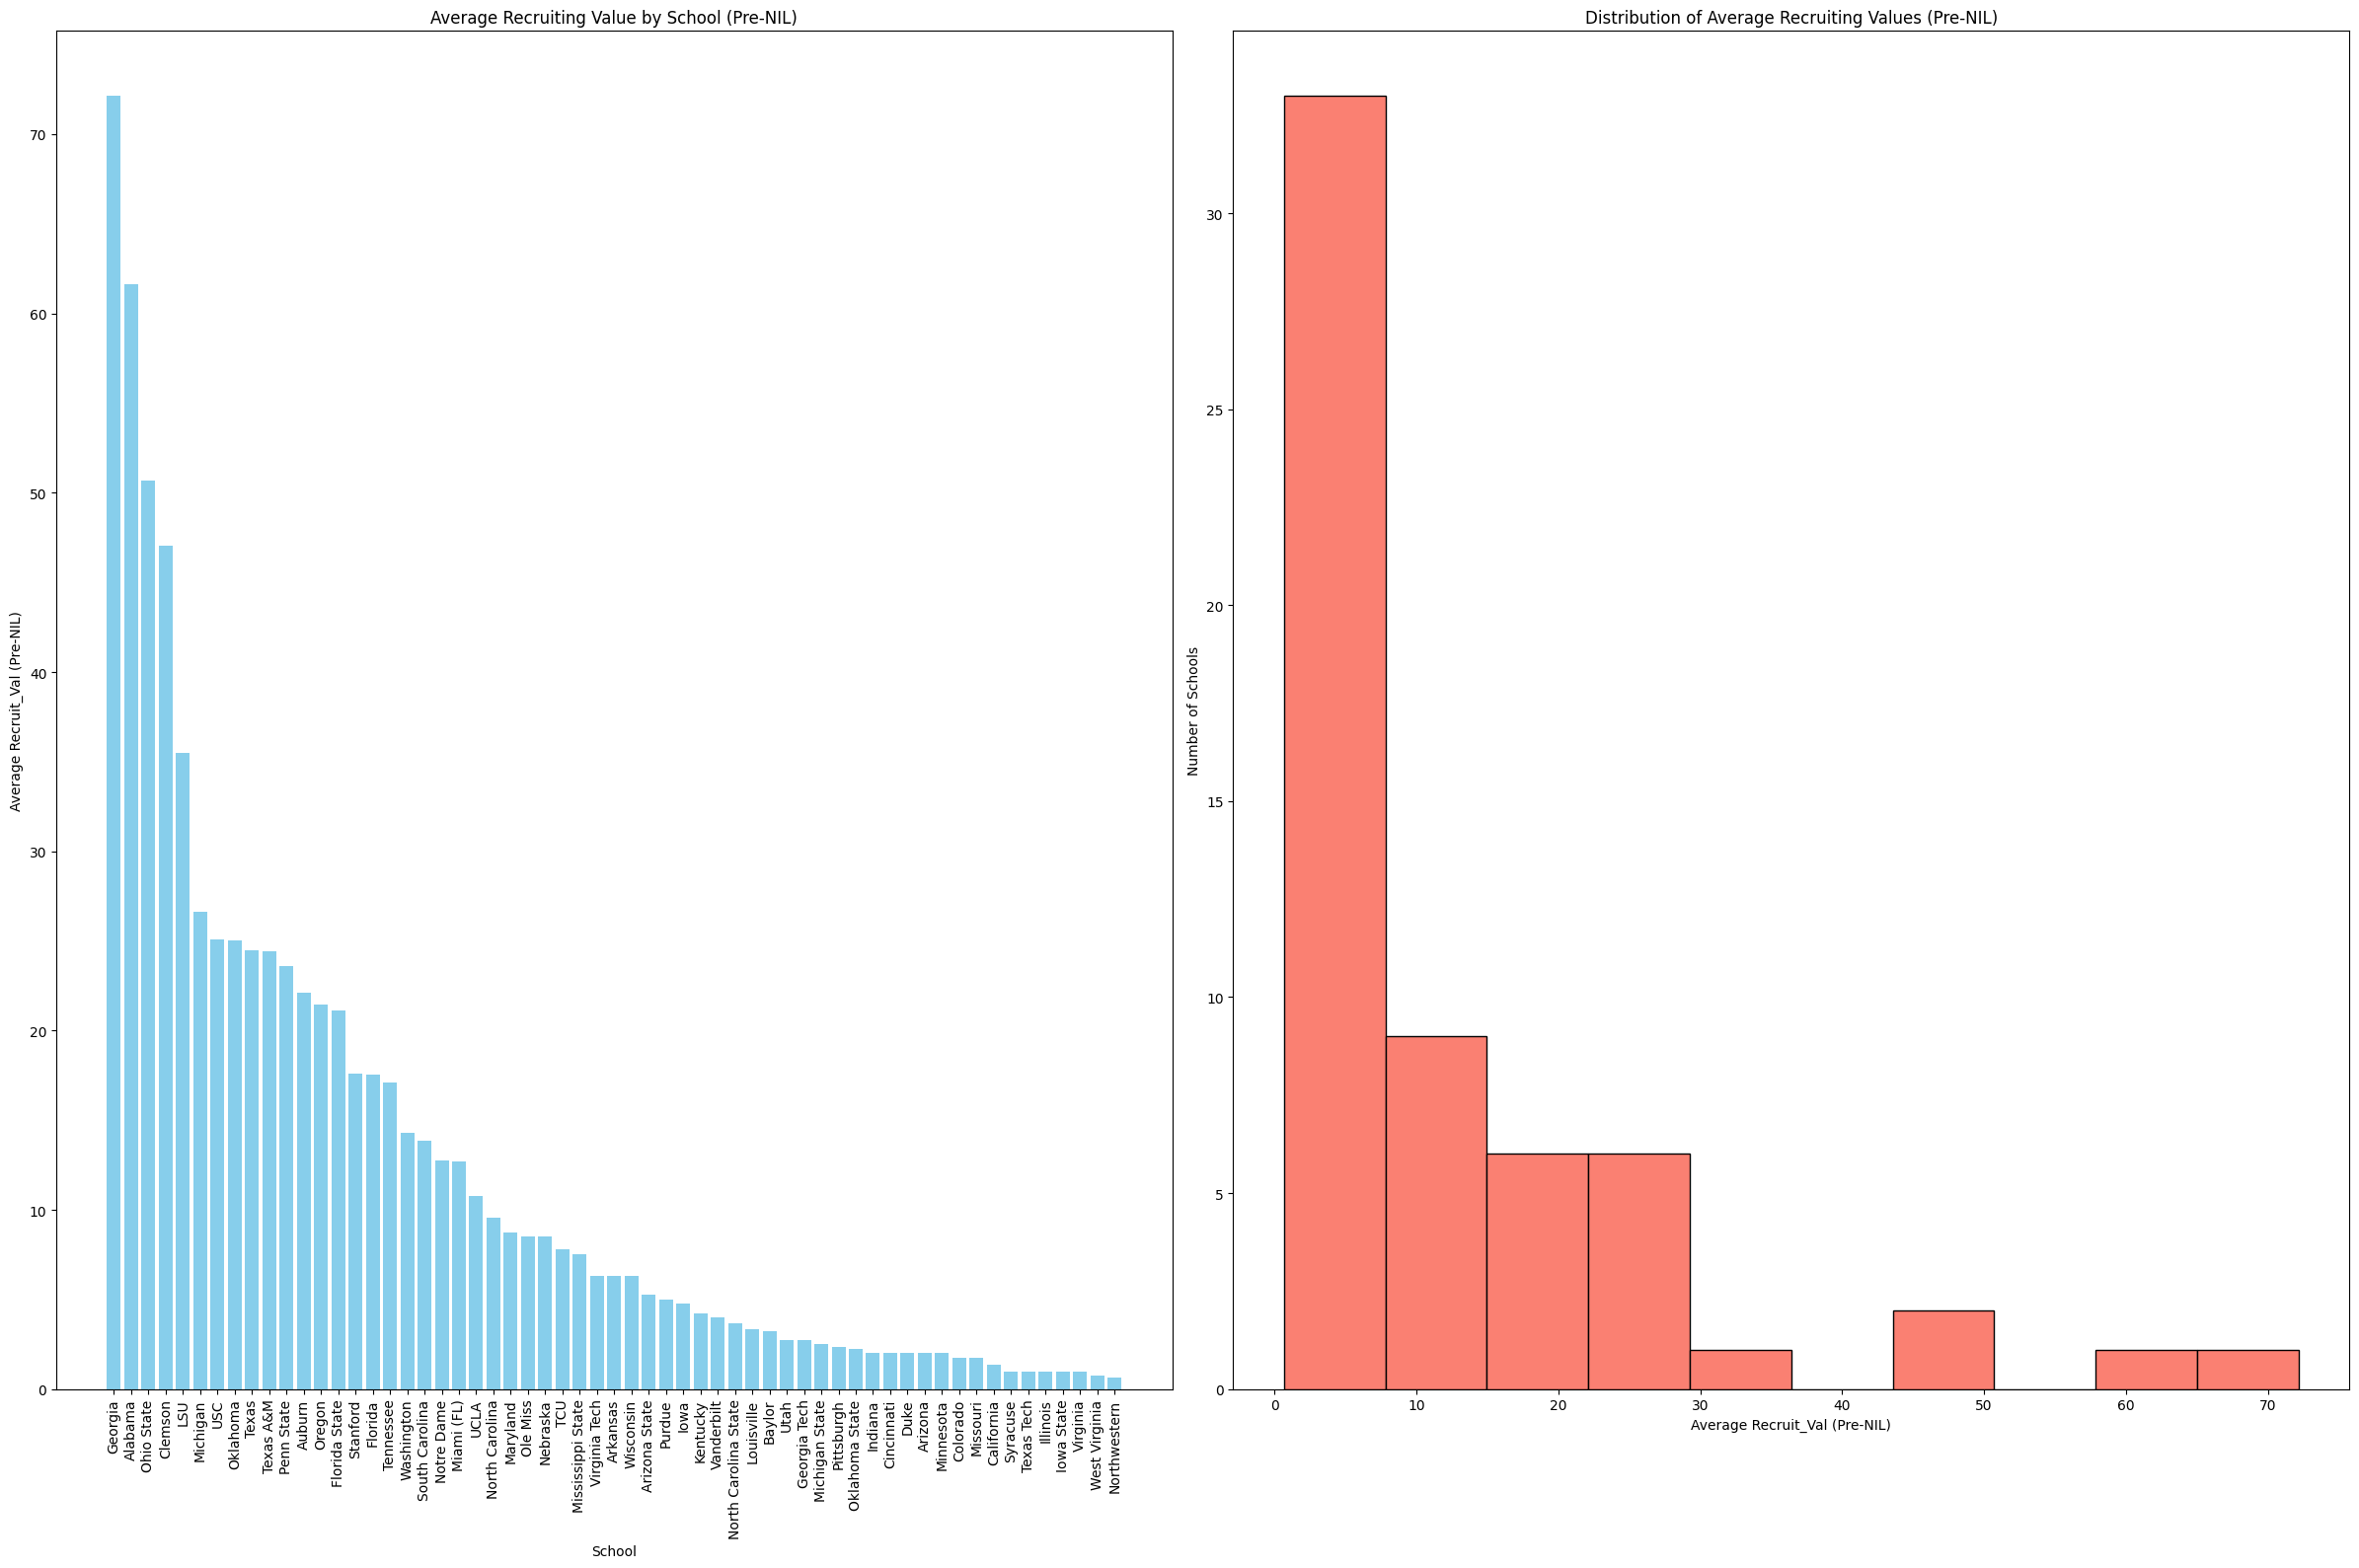

In [67]:
avg_recruit = plot_preNIL_recruit_val(df)

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Suppose 'avg_recruit' is a DataFrame with columns ['School', 'Recruit_Val']
X = avg_recruit[['Recruit_Val']].values  # shape (n_schools, 1)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

avg_recruit['Cluster'] = kmeans.labels_
# Identify which cluster has the higher mean
cluster_means = avg_recruit.groupby('Cluster')['Recruit_Val'].mean()
powerhouse_cluster = cluster_means.idxmax()

# Mark schools in that cluster as powerhouse
avg_recruit['Powerhouse'] = (avg_recruit['Cluster'] == powerhouse_cluster).astype(int)


In [22]:
avg_recruit

,School,Recruit_Val,Cluster,Powerhouse
13,Georgia,72.151989,1,1
0,Alabama,61.613636,1,1
34,Ohio State,50.654830,1,1
8,Clemson,47.018466,1,1
20,LSU,35.486506,1,1
24,Michigan,26.625000,1,1
51,USC,25.090909,1,1
35,Oklahoma,25.049006,1,1
47,Texas,24.457386,1,1
48,Texas A&M,24.437500,1,1


In [17]:
!pip install seaborn


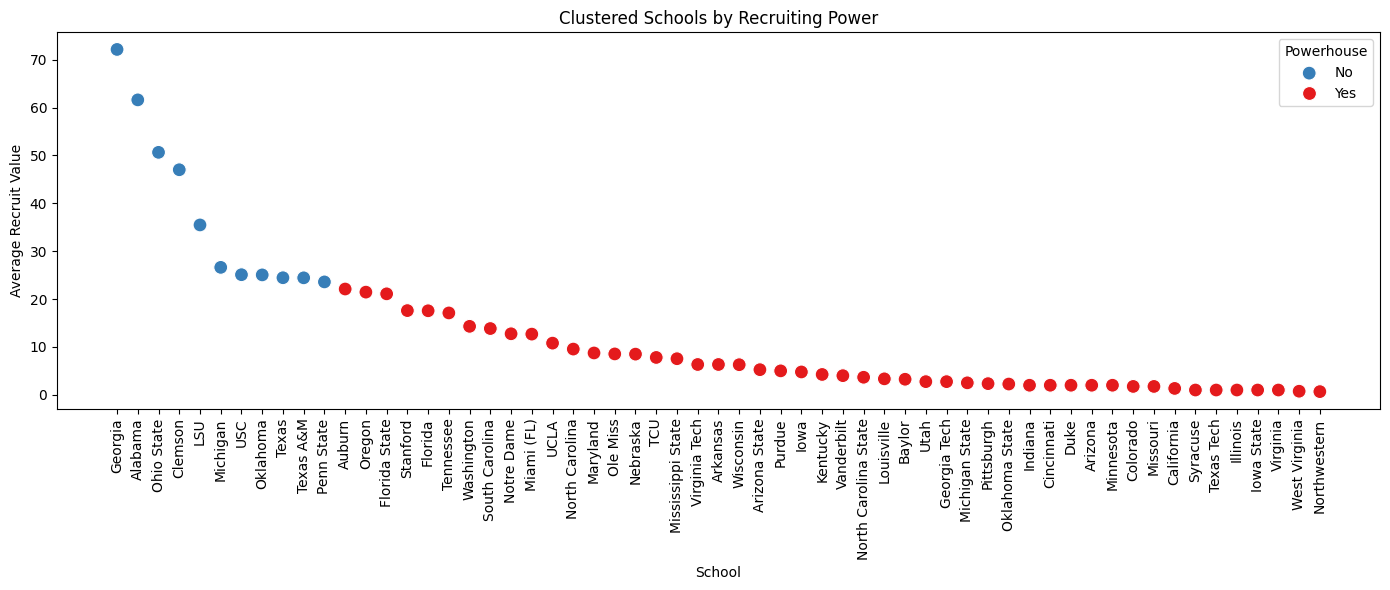

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.scatterplot(x='School', y='Recruit_Val', hue='Powerhouse', data=avg_recruit, palette='Set1', s=100)

plt.xticks(rotation=90)
plt.xlabel('School')
plt.ylabel('Average Recruit Value')
plt.title('Clustered Schools by Recruiting Power')
plt.legend(title='Powerhouse', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


In [23]:
#adding a powerhouse column to the original df based on the avg_recruit dataframe

In [24]:
# Create a mapping of schools to their powerhouse status
powerhouse_map = avg_recruit.set_index('School')['Powerhouse'].to_dict()

# Add the "Powerhouse" column to the original df
df['Powerhouse'] = df['School'].map(powerhouse_map).fillna(0).astype(int)

# Check the result
df


,Year,School,Conf,Recruit_Val,5 Stars,4 Stars,3 Stars,Total Commits,AVG NIL,Post_NIL,Coach Pay,Revenue,stadium_capacity,Powerhouse
0,2017,Alabama,SEC,94.656250,7,17,4,28,32000.0,0,10000000.0,214365357.0,101821,1
1,2018,Alabama,SEC,33.454545,2,12,5,21,32000.0,0,10000000.0,214365357.0,101821,1
2,2019,Alabama,SEC,56.468750,3,23,1,27,45000.0,0,10000000.0,214365357.0,101821,1
3,2020,Alabama,SEC,61.875000,4,17,4,25,74000.0,0,10000000.0,214365357.0,101821,1
4,2021,Alabama,SEC,75.781250,5,20,2,27,156000.0,1,10000000.0,214365357.0,101821,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2022,Houston,Big 12,1.000000,0,1,17,21,41000.0,1,4500000.0,78088086.0,40000,0
395,2023,Kansas State,Big 12,1.000000,0,1,25,27,122000.0,1,5250000.0,100822204.0,50000,0
396,2024,Kansas State,Big 12,1.000000,0,1,15,16,30000.0,1,5250000.0,100822204.0,50000,0
397,2024,Kansas,Big 12,3.000000,0,3,14,17,36000.0,1,7500000.0,118020175.0,50071,0


In [25]:
#jsonifying the data once again to send to LLM 
json_str = df.to_json(orient='records', indent=2)
print(json_str)

[
  {
    "Year":2017,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":94.65625,
    "5 Stars":7,
    "4 Stars":17,
    "3 Stars":4,
    "Total Commits":28,
    "AVG NIL":32000.0,
    "Post_NIL":0,
    "Coach Pay":10000000.0,
    "Revenue":214365357.0,
    "stadium_capacity":101821,
    "Powerhouse":1
  },
  {
    "Year":2018,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":33.4545454545,
    "5 Stars":2,
    "4 Stars":12,
    "3 Stars":5,
    "Total Commits":21,
    "AVG NIL":32000.0,
    "Post_NIL":0,
    "Coach Pay":10000000.0,
    "Revenue":214365357.0,
    "stadium_capacity":101821,
    "Powerhouse":1
  },
  {
    "Year":2019,
    "School":"Alabama",
    "Conf":"SEC",
    "Recruit_Val":56.46875,
    "5 Stars":3,
    "4 Stars":23,
    "3 Stars":1,
    "Total Commits":27,
    "AVG NIL":45000.0,
    "Post_NIL":0,
    "Coach Pay":10000000.0,
    "Revenue":214365357.0,
    "stadium_capacity":101821,
    "Powerhouse":1
  },
  {
    "Year":2020,
    "School":"Alab

In [29]:
 import statsmodels.formula.api as smf

# Example: Using a formula approach in statsmodels
# We'll add C(Year) and C(School) for fixed effects
# And create the interaction in the formula: Post_NIL:Powerhouse
model = smf.ols(
    formula="""
    Recruit_Val 
    ~ Post_NIL 
    + Powerhouse 
    + Post_NIL:Powerhouse
    + Revenue
    + Q('Coach Pay')
    + C(Year)
    + C(School)
    """,
    data=df
).fit(cov_type='HC3')  # For robust standard errors
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     9.112
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.62e-37
Time:                        14:24:45   Log-Likelihood:                -1207.3
No. Observations:                 320   AIC:                             2533.
Df Residuals:                     261   BIC:                             2755.
Df Model:                          58                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 77, but rank is 57
  warnings.warn('covariance of constraints does not have full '


In [37]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV

df = df.rename(columns={"Coach Pay": "Coach_Pay", "AVG NIL": "AVG_NIL"})

# === STEP 1: Prepare the Data and Create the Interaction ===

# Ensure that your columns are correctly named.
# For example, we assume:
#   - RecruitOutcome is the dependent variable (the recruiting index)
#   - NIL is your NIL dummy (0 for pre-NIL, 1 for post-NIL)
#   - Powerhouse is your treatment dummy (1 for powerhouse schools, 0 for non-powerhouse)
#   - Revenue and CoachPay are continuous control variables.
#   - School and Year are categorical fixed effects.

# If you don't have an interaction variable, create one:
df['NIL_Powerhouse'] = df['Post_NIL'] * df['Powerhouse']

# === STEP 2: Check for Multicollinearity (VIF Calculation) ===

# We need a design matrix (without the fixed effects dummies) for VIF calculations.
# For a first check, use the main continuous and dummy variables:
X_vif = df[['Post_NIL', 'Powerhouse', 'NIL_Powerhouse', 'Revenue', 'Coach_Pay']].copy()

# Drop rows with missing values in these columns (if any)
X_vif = X_vif.dropna()

# Add constant (if needed for statsmodels VIF calculation)
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each explanatory variable
vif_df = pd.DataFrame({
    'Variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print("Variance Inflation Factors:")
print(vif_df)

# === STEP 3: Run the OLS Regression with Robust (HC3) SEs ===

# We include fixed effects for School and Year using the C() notation.
# Note: statsmodels by default drops one category for C() so you don’t fall into the dummy variable trap.
formula = ("Recruit_Val ~ Post_NIL + Powerhouse + Post_NIL:Powerhouse + Revenue + Coach_Pay "
           "+ C(School) + C(Year)")

# Run the regression with HC3 robust SEs
model = smf.ols(formula=formula, data=df).fit(cov_type='HC3')
print(model.summary())

# === STEP 4: Examine the Eigenvalues of the Design Matrix ===

# Get the design matrix (explanatory variables used in the model)
X_design = model.model.exog
eigenvalues = np.linalg.eigvals(np.dot(X_design.T, X_design))
print("Eigenvalues of the design matrix:")
print(eigenvalues)
print("Smallest eigenvalue:", np.min(eigenvalues))

# === STEP 5 (Optional): Try a Ridge Regression to Mitigate Multicollinearity ===

from sklearn.linear_model import RidgeCV

# Prepare the design matrix for ridge regression (we exclude fixed effects dummies for now)
# For example, here we use only the main variables (you might need to decide how to handle fixed effects):
X_ridge = df[['Post_NIL', 'Powerhouse', 'Revenue', 'Coach_Pay']].copy()
X_ridge['NIL_Powerhouse'] = df['Post_NIL'] * df['Powerhouse']
X_ridge = X_ridge.dropna()
y_ridge = df['Recruit_Val'].loc[X_ridge.index]

# Fit Ridge regression with cross-validated alpha
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_ridge, y_ridge)
print("Ridge regression coefficients:")
print(ridge_model.coef_)
print("Chosen alpha:", ridge_model.alpha_)


Variance Inflation Factors:
         Variable        VIF
0           const  30.264494
1        Post_NIL   1.333808
2      Powerhouse   3.357298
3  NIL_Powerhouse   2.333564
4         Revenue   2.983513
5       Coach_Pay   2.002552
                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     9.112
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.62e-37
Time:                        14:34:26   Log-Likelihood:                -1207.3
No. Observations:                 320   AIC:                             2533.
Df Residuals:                     261   BIC:                             2755.
Df Model:                          58                                         
Covariance Type:                  HC3                     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 77, but rank is 57
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.58411e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.33047e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.89045e-17): 

In [38]:
# Create a copy of the data for within transformation
df_within = df.copy()

# For each school, compute the school mean for the key variables
grouped = df_within.groupby('School')
df_within['Recruit_Val_demeaned'] = df_within['Recruit_Val'] - grouped['Recruit_Val'].transform('mean')
df_within['Post_NIL_demeaned'] = df_within['Post_NIL'] - grouped['Post_NIL'].transform('mean')
df_within['Powerhouse_demeaned'] = df_within['Powerhouse'] - grouped['Powerhouse'].transform('mean')
df_within['Revenue_demeaned'] = df_within['Revenue'] - grouped['Revenue'].transform('mean')
df_within['Coach_Pay_demeaned'] = df_within['Coach_Pay'] - grouped['Coach_Pay'].transform('mean')

# Recreate the interaction on the demeaned data
df_within['NIL_Powerhouse_demeaned'] = df_within['Post_NIL_demeaned'] * df_within['Powerhouse_demeaned']

# Run the OLS regression on the demeaned data (School fixed effects are differenced out)
formula_within = ("Recruit_Val_demeaned ~ Post_NIL_demeaned + Powerhouse_demeaned + Post_NIL_demeaned:Powerhouse_demeaned "
                  "+ Revenue_demeaned + Coach_Pay_demeaned + C(Year)")
model_within = smf.ols(formula=formula_within, data=df_within).fit(cov_type='HC3')
print(model_within.summary())

# Examine eigenvalues again
X_design_within = model_within.model.exog
eigenvalues_within = np.linalg.eigvals(np.dot(X_design_within.T, X_design_within))
print("Eigenvalues (within transformation):")
print(eigenvalues_within)
print("Smallest eigenvalue (within transformation):", np.min(eigenvalues_within))


                             OLS Regression Results                             
Dep. Variable:     Recruit_Val_demeaned   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.021
Method:                   Least Squares   F-statistic:                    0.1793
Date:                  Sun, 23 Mar 2025   Prob (F-statistic):              0.994
Time:                          14:38:45   Log-Likelihood:                -1207.3
No. Observations:                   320   AIC:                             2433.
Df Residuals:                       311   BIC:                             2467.
Df Model:                             8                                         
Covariance Type:                    HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 8
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     9.112
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.62e-37
Time:                        14:50:58   Log-Likelihood:                -1207.3
No. Observations:                 320   AIC:                             2533.
Df Residuals:                     261   BIC:                             2755.
Df Model:                          58                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 76, but rank is 57
  warnings.warn('covariance of constraints does not have full '


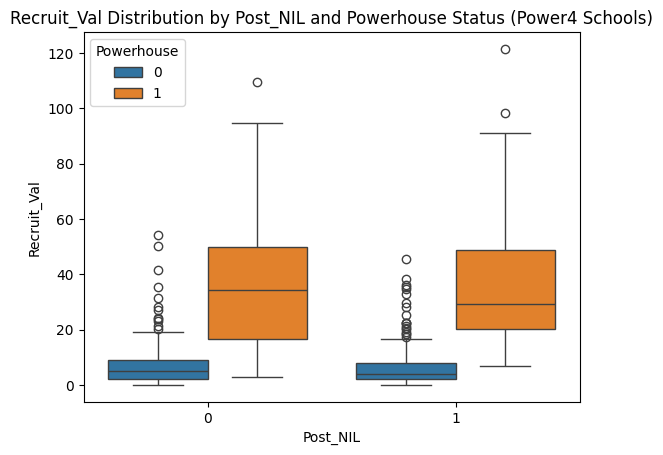

Group Statistics (Recruit_Val) by Post_NIL and Powerhouse:
                          mean        std  count
Post_NIL Powerhouse                             
0        0            7.498815   9.018632    151
         1           37.833613  24.345543     44
1        0            7.281674   8.565578    152
         1           38.367852  25.765483     44


In [39]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already loaded and cleaned, with columns: 
# 'Recruit_Val', 'Post_NIL', 'Powerhouse', 'Revenue', 'Coach_Pay', 'School', 'Year'
# And that we have already renamed "Coach Pay" to "Coach_Pay" and "AVG NIL" to "AVG_NIL" as needed.

# Filter the dataset for Power4 conferences (SEC, Big Ten, ACC, Big 12)
power4_confs = ['SEC', 'Big Ten', 'ACC', 'Big 12']
df_power4 = df[df['Conf'].isin(power4_confs)].copy()

# Create the interaction term (if not already created)
df_power4['NIL_Powerhouse'] = df_power4['Post_NIL'] * df_power4['Powerhouse']

# Run the DiD regression including school and year fixed effects.
# Here, Year is controlled for as it captures time-specific effects that might affect recruiting outcomes.
formula_did = ("Recruit_Val ~ Post_NIL + Powerhouse + Post_NIL:Powerhouse + Revenue + Coach_Pay + C(School) + C(Year)")
did_model = smf.ols(formula=formula_did, data=df_power4).fit(cov_type='HC3')
print(did_model.summary())

# Graphically examine the distribution of Recruit_Val for powerhouses vs non-powerhouses by Post_NIL status
sns.boxplot(x='Post_NIL', y='Recruit_Val', hue='Powerhouse', data=df_power4)
plt.title("Recruit_Val Distribution by Post_NIL and Powerhouse Status (Power4 Schools)")
plt.show()

# Additionally, compute group-level statistics (mean, std, count) for further diagnostics:
group_stats = df_power4.groupby(['Post_NIL', 'Powerhouse'])['Recruit_Val'].agg(['mean', 'std', 'count'])
print("Group Statistics (Recruit_Val) by Post_NIL and Powerhouse:")
print(group_stats)


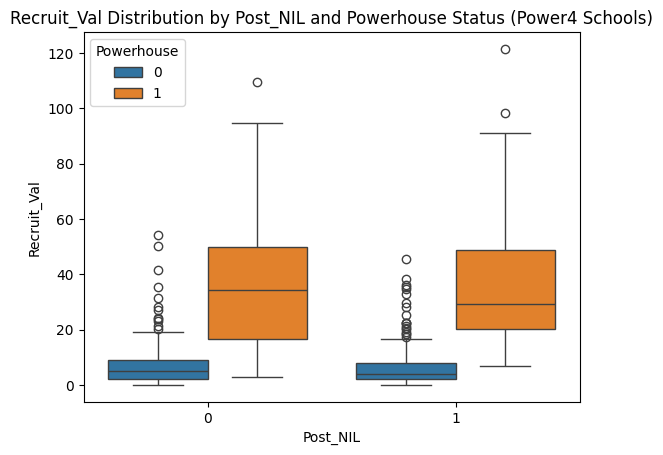

Group Statistics (Recruit_Val) by Post_NIL and Powerhouse:
                          mean        std  count
Post_NIL Powerhouse                             
0        0            7.498815   9.018632    151
         1           37.833613  24.345543     44
1        0            7.281674   8.565578    152
         1           38.367852  25.765483     44


()

In [69]:
# Graphically examine the distribution of Recruit_Val for powerhouses vs non-powerhouses by Post_NIL status
sns.boxplot(x='Post_NIL', y='Recruit_Val', hue='Powerhouse', data=df_power4)
plt.title("Recruit_Val Distribution by Post_NIL and Powerhouse Status (Power4 Schools)")
plt.show()

# Additionally, compute group-level statistics (mean, std, count) for further diagnostics:
group_stats = df_power4.groupby(['Post_NIL', 'Powerhouse'])['Recruit_Val'].agg(['mean', 'std', 'count'])
print("Group Statistics (Recruit_Val) by Post_NIL and Powerhouse:")
print(group_stats)
/


In [40]:
formula_no_year = ("Recruit_Val ~ Post_NIL + Powerhouse + Post_NIL:Powerhouse + Revenue + Coach_Pay + C(School)")
model_no_year = smf.ols(formula=formula_no_year, data=df_power4).fit(cov_type='HC3')
print(model_no_year.summary())


                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     804.1
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          1.65e-264
Time:                        14:55:35   Log-Likelihood:                -1208.0
No. Observations:                 320   AIC:                             2522.
Df Residuals:                     267   BIC:                             2722.
Df Model:                          52                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 69, but rank is 51
  warnings.warn('covariance of constraints does not have full '


In [44]:
df_avg = df_power4.groupby(['School', 'Post_NIL']).agg({
    'Recruit_Val': 'mean',
    'Revenue': 'mean',
    'Coach_Pay': 'mean',
    # Include other variables as needed
}).reset_index()

# Create the interaction (if needed) or run a simple DID regression on this collapsed dataset.
formula_avg = "Recruit_Val ~ Post_NIL + C(School)"
model_avg = smf.ols(formula=formula_avg, data=df_avg).fit(cov_type='HC3')
print(model_avg.summary())


                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     393.7
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           2.22e-58
Time:                        14:59:43   Log-Likelihood:                -323.11
No. Observations:                 122   AIC:                             778.2
Df Residuals:                      56   BIC:                             963.3
Df Model:                          65                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

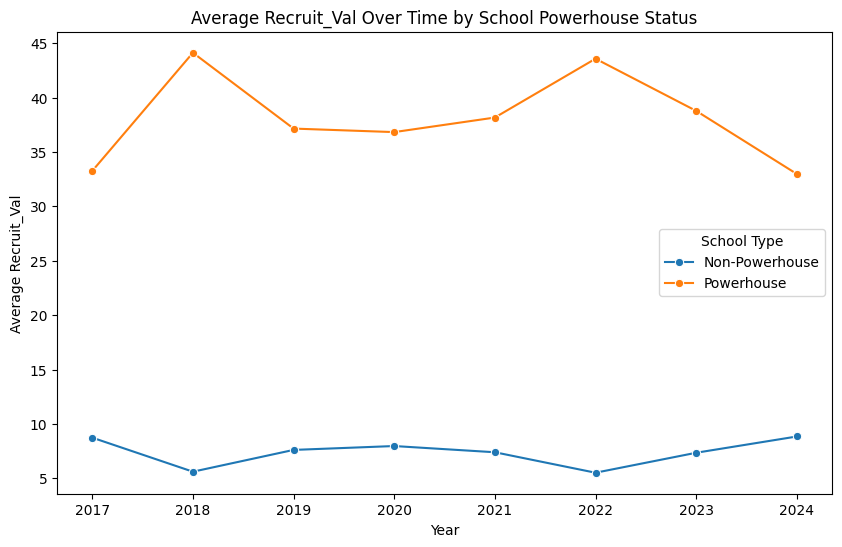

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Group the entire df_power4 (no filtering) by Year and Powerhouse
df_time = df_power4.groupby(['Year', 'Powerhouse'])['Recruit_Val'].mean().reset_index()

# 2) Create a more descriptive label for Powerhouse
df_time['Powerhouse_Label'] = df_time['Powerhouse'].map({0: 'Non-Powerhouse', 1: 'Powerhouse'})

# 3) Plot the trends across ALL years (2017-2024), removing decimal ticks
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_time, x='Year', y='Recruit_Val', hue='Powerhouse_Label', marker='o')

plt.title("Average Recruit_Val Over Time by School Powerhouse Status")
plt.xlabel("Year")
plt.ylabel("Average Recruit_Val")

# Ensure x-axis ticks are only the integer years present in your dataset
unique_years = sorted(df_time['Year'].unique())
plt.xticks(unique_years, [str(int(y)) for y in unique_years])  # convert to string for clean labels

plt.legend(title='School Type')
plt.show()


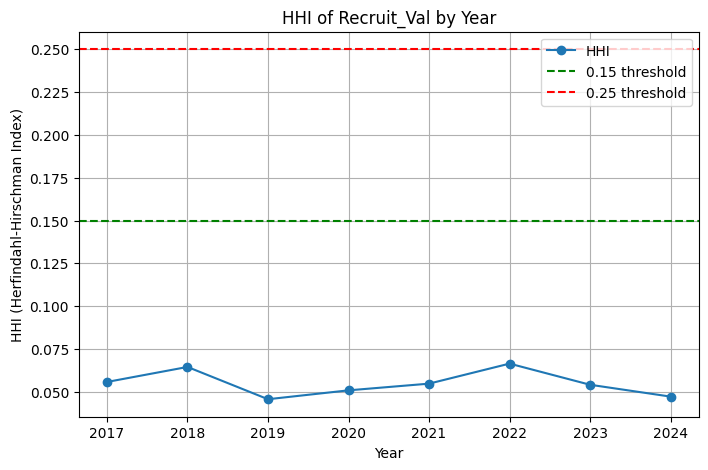

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1) Compute HHI by Year
# ---------------------------------------------------


# Group by Year, then for each year compute each school's share
# and sum of squares of shares
hhi_list = []

for year, group in df.groupby('Year'):
    # sum of recruit_val for that year
    total_recruit_val = group['Recruit_Val'].sum()

    # compute each school's share
    group['share'] = group['Recruit_Val'] / total_recruit_val

    # compute HHI = sum of squares of shares
    hhi_year = (group['share'] ** 2).sum()

    hhi_list.append({'Year': year, 'HHI': hhi_year})

# Create a DataFrame of results
df_hhi = pd.DataFrame(hhi_list).sort_values('Year')

# ---------------------------------------------------
# 2) Plot HHI Over Time
# ---------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(df_hhi['Year'], df_hhi['HHI'], marker='o', label='HHI')

# Optionally add some horizontal reference lines for typical HHI thresholds
plt.axhline(y=0.15, color='green', linestyle='--', label='0.15 threshold')
plt.axhline(y=0.25, color='red', linestyle='--', label='0.25 threshold')

plt.title("HHI of Recruit_Val by Year")
plt.xlabel("Year")
plt.ylabel("HHI (Herfindahl-Hirschman Index)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 3) Interpretation
# ---------------------------------------------------
# The lower the HHI, the more "spread out" or competitive the recruiting
# environment is for that year. The higher the HHI, the more concentrated
# (a few schools capturing the bulk of the total recruit_val).


In [51]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# ========== STEP 0: PREPARE DATA (SAME AS BEFORE) ==========
# 1) We assume df is your main DataFrame with columns:
#    'Recruit_Val', 'Post_NIL', 'Powerhouse', 'Revenue', 'Coach_Pay',
#    'School', 'Year', 'Conf', etc.
# 2) Filter to your Power4 conferences if needed
power4_confs = ['SEC', 'Big Ten', 'ACC', 'Big 12']
df_power4 = df[df['Conf'].isin(power4_confs)].copy()

# ========== STEP 1: DEFINE RELATIVE YEAR ==========
df_power4['YearRelative'] = df_power4['Year'] - 2021
df_power4


,Year,School,Conf,Recruit_Val,5 Stars,4 Stars,3 Stars,Total Commits,AVG_NIL,Post_NIL,Coach_Pay,Revenue,stadium_capacity,Powerhouse,NIL_Powerhouse,YearRelative
0,2017,Alabama,SEC,94.656250,7,17,4,28,32000.0,0,10000000.0,214365357.0,101821,1,0,-4
1,2018,Alabama,SEC,33.454545,2,12,5,21,32000.0,0,10000000.0,214365357.0,101821,1,0,-3
2,2019,Alabama,SEC,56.468750,3,23,1,27,45000.0,0,10000000.0,214365357.0,101821,1,0,-2
3,2020,Alabama,SEC,61.875000,4,17,4,25,74000.0,0,10000000.0,214365357.0,101821,1,0,-1
4,2021,Alabama,SEC,75.781250,5,20,2,27,156000.0,1,10000000.0,214365357.0,101821,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2022,Houston,Big 12,1.000000,0,1,17,21,41000.0,1,4500000.0,78088086.0,40000,0,0,1
395,2023,Kansas State,Big 12,1.000000,0,1,25,27,122000.0,1,5250000.0,100822204.0,50000,0,0,2
396,2024,Kansas State,Big 12,1.000000,0,1,15,16,30000.0,1,5250000.0,100822204.0,50000,0,0,3
397,2024,Kansas,Big 12,3.000000,0,3,14,17,36000.0,1,7500000.0,118020175.0,50071,0,0,3


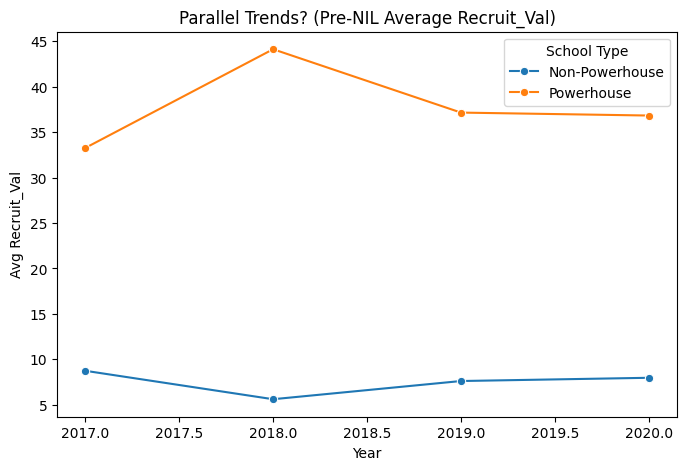

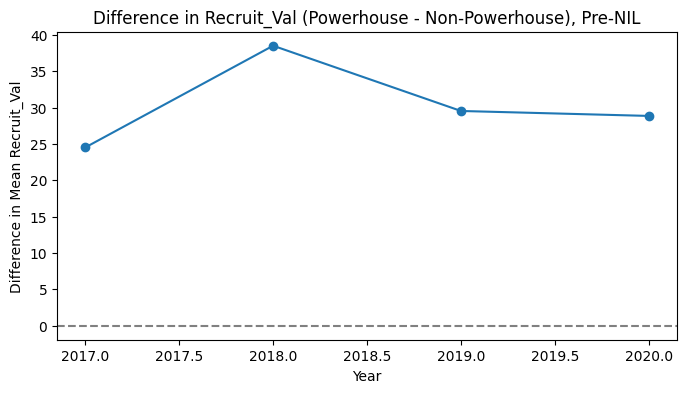

In [49]:
# ========== STEP 2: PARALLEL TRENDS (VISUAL) ==========

# Filter to pre-NIL years only
df_preNIL = df_power4[df_power4['Year'] < 2021].copy()

# Compute average Recruit_Val by (Year, Powerhouse)
avg_preNIL = df_preNIL.groupby(['Year','Powerhouse'])['Recruit_Val'].mean().reset_index()

# Map Powerhouse to labels
avg_preNIL['Powerhouse_Label'] = avg_preNIL['Powerhouse'].map({0: 'Non-Powerhouse', 1: 'Powerhouse'})

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_preNIL, x='Year', y='Recruit_Val', hue='Powerhouse_Label', marker='o')
plt.title("Parallel Trends? (Pre-NIL Average Recruit_Val)")
plt.xlabel("Year")
plt.ylabel("Avg Recruit_Val")
plt.legend(title='School Type')
plt.show()

# OPTIONAL: Plot the difference (Powerhouse - Non-Powerhouse) in each year pre-NIL
# Merge so we have a single row per year with both means
pivot_preNIL = avg_preNIL.pivot(index='Year', columns='Powerhouse_Label', values='Recruit_Val')
pivot_preNIL['Difference'] = pivot_preNIL['Powerhouse'] - pivot_preNIL['Non-Powerhouse']

plt.figure(figsize=(8,4))
plt.plot(pivot_preNIL.index, pivot_preNIL['Difference'], marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Difference in Recruit_Val (Powerhouse - Non-Powerhouse), Pre-NIL")
plt.xlabel("Year")
plt.ylabel("Difference in Mean Recruit_Val")
plt.show()


Unique YearRelative categories: Index([-4, -3, -2, -1, 0, 1, 2, 3, 4], dtype='int64')
                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     7.051
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.87e-30
Time:                        15:33:51   Log-Likelihood:                -1202.2
No. Observations:                 320   AIC:                             2534.
Df Residuals:                     255   BIC:                             2779.
Df Model:                          64                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 83, but rank is 63
  warnings.warn('covariance of constraints does not have full '


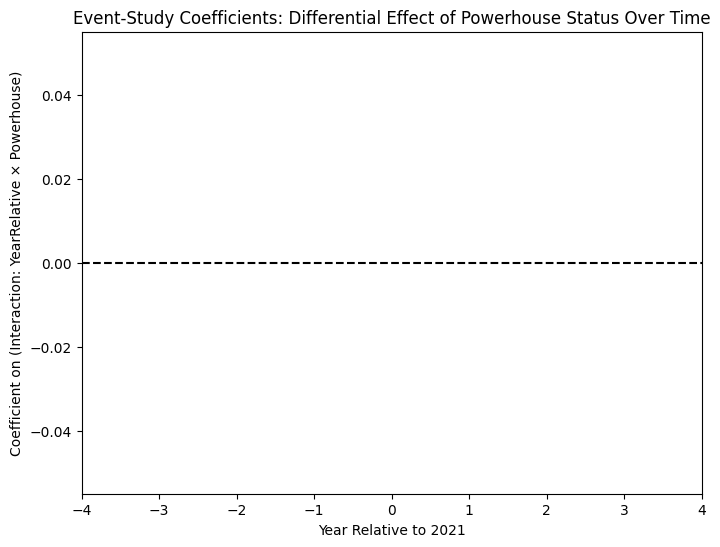

In [53]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import re

# ========= Prepare the YearRelative Variable =========
# Create a new variable for year relative to a chosen reference (e.g., 2021)
df_power4['YearRelative'] = (df_power4['Year'] - 2021).astype(int)

# Define the desired categories as integers (e.g., from -4 to 4)
desired_categories = list(range(-4, 5))  # This produces [-4, -3, -2, -1, 0, 1, 2, 3, 4]
# Convert YearRelative to a categorical variable with the desired ordering.
df_power4['YearRelative'] = pd.Categorical(df_power4['YearRelative'], categories=desired_categories, ordered=True)

# Check the unique categories to verify
print("Unique YearRelative categories:", df_power4['YearRelative'].cat.categories)

# ========= STEP 3: Dynamic / Event-Study DID =========
# The model below estimates the effect of Powerhouse status in each relative year,
# while controlling for school fixed effects (C(School)) and continuous controls.
formula_event_study = """
Recruit_Val ~ C(YearRelative) + C(YearRelative):Powerhouse + C(School) + Revenue + Coach_Pay
"""

# Run the OLS regression with heteroscedasticity-robust (HC3) standard errors.
model_event_study = smf.ols(formula_event_study, data=df_power4).fit(cov_type='HC3')
print(model_event_study.summary())

# ========= STEP 3b: Plot the Event-Study Coefficients =========
# Extract the coefficients for the interaction terms between YearRelative and Powerhouse.
coefs = model_event_study.params
conf_int = model_event_study.conf_int()
coefs_event = []

for param_name in coefs.index:
    # The interaction terms are labeled as "C(YearRelative)[T.<value>]:Powerhouse"
    match = re.match(r"C\(YearRelative\)\[T\.(-?\d+)\]:Powerhouse", param_name)
    if match:
        year_rel = int(match.group(1))
        beta = coefs[param_name]
        ci_lower = conf_int.loc[param_name, 0]
        ci_upper = conf_int.loc[param_name, 1]
        coefs_event.append((year_rel, beta, ci_lower, ci_upper))

# Sort the results by YearRelative
coefs_event.sort(key=lambda x: x[0])
df_event = pd.DataFrame(coefs_event, columns=['YearRelative', 'Beta', 'CI_Lower', 'CI_Upper'])

# Plot the event-study coefficients with error bars.
plt.figure(figsize=(8, 6))
plt.axhline(0, color='black', linestyle='--')
plt.errorbar(df_event['YearRelative'], df_event['Beta'],
             yerr=[df_event['Beta'] - df_event['CI_Lower'], df_event['CI_Upper'] - df_event['Beta']],
             fmt='o', capsize=4)
plt.title("Event-Study Coefficients: Differential Effect of Powerhouse Status Over Time")
plt.xlabel("Year Relative to 2021")
plt.ylabel("Coefficient on (Interaction: YearRelative × Powerhouse)")
plt.xticks(desired_categories)  # Ensure x-axis labels are whole numbers.
plt.show()


In [54]:
# EXAMPLE: Exclude top 5% in Revenue
revenue_cut = df_power4['Revenue'].quantile(0.95)
df_robust = df_power4[df_power4['Revenue'] <= revenue_cut].copy()

# Then run the same event-study regression
model_robust = smf.ols(formula_event_study, data=df_robust).fit(cov_type='HC3')
print(model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     6.580
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           8.81e-27
Time:                        15:34:22   Log-Likelihood:                -1125.0
No. Observations:                 304   AIC:                             2376.
Df Residuals:                     241   BIC:                             2610.
Df Model:                          62                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 67, but rank is 61
  warnings.warn('covariance of constraints does not have full '


=== Parallel Trends (Pre-NIL) Regression ===
                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           1.71e-11
Time:                        16:47:40   Log-Likelihood:                -787.63
No. Observations:                 195   AIC:                             1591.
Df Residuals:                     187   BIC:                             1617.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

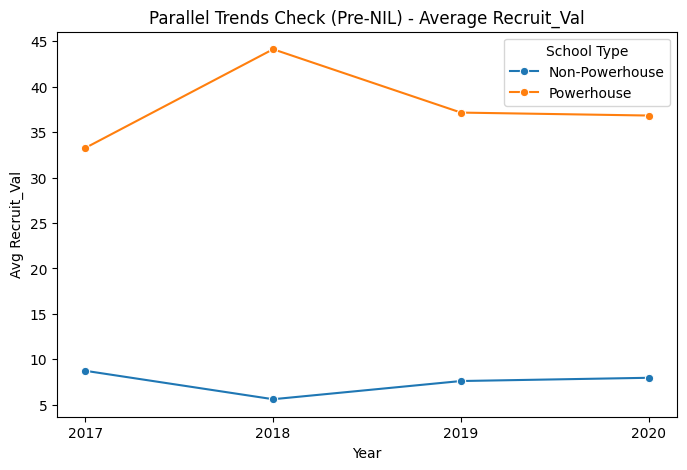

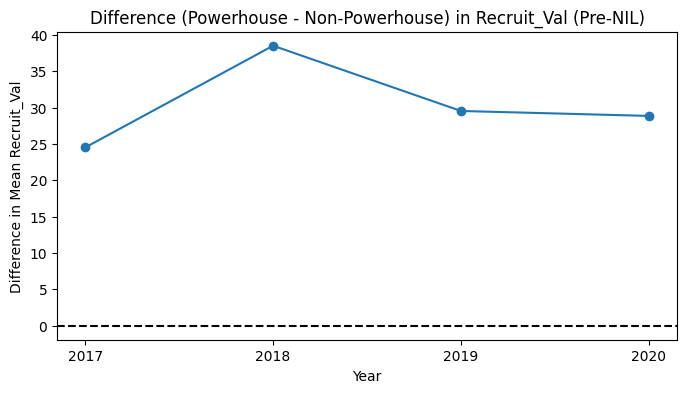

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

#############################################
# STEP 1: PARALLEL TRENDS (PRE-NIL PERIOD) #
#############################################

# 1. Filter to only pre-NIL data
df_preNIL = df_power4[df_power4['Post_NIL'] == 0].copy()

# 2. Create an interaction between (Year) and (Powerhouse)
#    We'll run a regression to see if the difference between
#    Powerhouse vs. Non-powerhouse changes significantly over time.

#    E.g. Recruit_Val ~ C(Year) * Powerhouse
#    If the Year*Powerhouse coefficients are not significant (or no upward/downward trend),
#    that suggests parallel trends in the pre-NIL window.

formula_par_trends = "Recruit_Val ~ C(Year) * Powerhouse"
model_par_trends = smf.ols(formula=formula_par_trends, data=df_preNIL).fit(cov_type='HC3')
print("=== Parallel Trends (Pre-NIL) Regression ===")
print(model_par_trends.summary())

# 3. Visualization: plot the average Recruit_Val for each Year, split by Powerhouse
df_preNIL_avg = df_preNIL.groupby(['Year','Powerhouse'])['Recruit_Val'].mean().reset_index()
df_preNIL_avg['Powerhouse_Label'] = df_preNIL_avg['Powerhouse'].map({0:'Non-Powerhouse', 1:'Powerhouse'})

plt.figure(figsize=(8,5))
sns.lineplot(data=df_preNIL_avg, x='Year', y='Recruit_Val', hue='Powerhouse_Label', marker='o')
plt.title("Parallel Trends Check (Pre-NIL) - Average Recruit_Val")
plt.xlabel("Year")
plt.ylabel("Avg Recruit_Val")
plt.legend(title='School Type')
plt.xticks(sorted(df_preNIL['Year'].unique()))  # Fix x-axis ticks here
plt.show()

# (Optional) We can also plot the difference in means over time:
df_diff = df_preNIL_avg.pivot(index='Year', columns='Powerhouse_Label', values='Recruit_Val')
df_diff['Diff'] = df_diff['Powerhouse'] - df_diff['Non-Powerhouse']
plt.figure(figsize=(8,4))
plt.plot(df_diff.index, df_diff['Diff'], marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.title("Difference (Powerhouse - Non-Powerhouse) in Recruit_Val (Pre-NIL)")
plt.xlabel("Year")

plt.ylabel("Difference in Mean Recruit_Val")
plt.xticks(sorted(df_preNIL['Year'].unique()))  # Fix x-axis ticks here
plt.show()


=== Parallel Trends (Pre-NIL) Regression ===
                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           1.71e-11
Time:                        15:48:12   Log-Likelihood:                -787.63
No. Observations:                 195   AIC:                             1591.
Df Residuals:                     187   BIC:                             1617.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

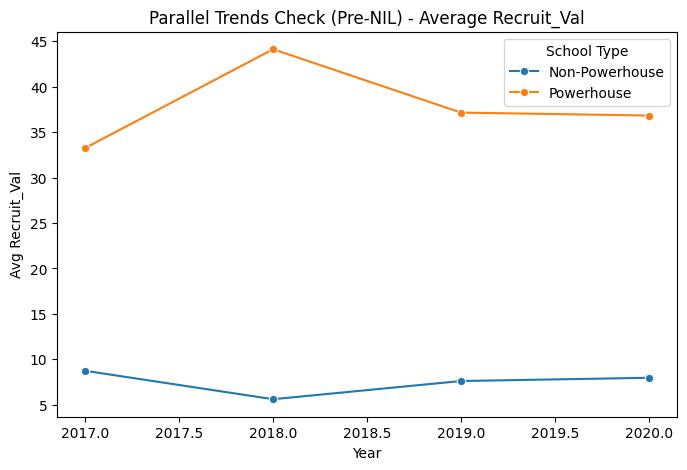

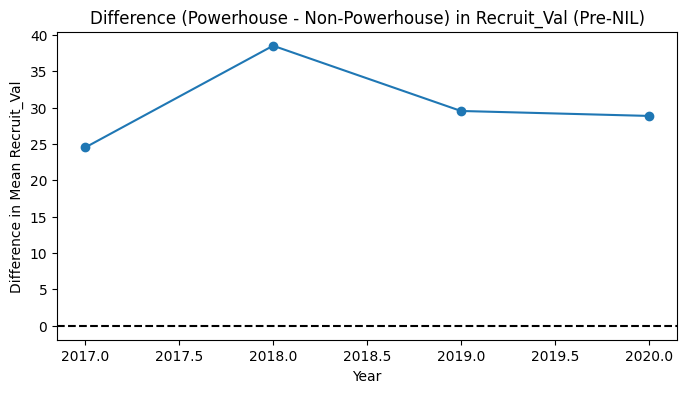

=== Main DiD Regression ===
                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     9.112
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.62e-37
Time:                        15:48:13   Log-Likelihood:                -1207.3
No. Observations:                 320   AIC:                             2533.
Df Residuals:                     261   BIC:                             2755.
Df Model:                          58                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 76, but rank is 57
  warnings.warn('covariance of constraints does not have full '


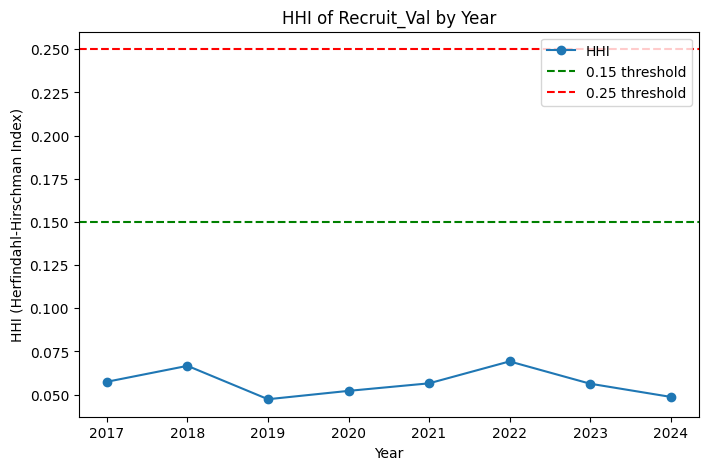

=== HHI by Year ===
   Year       HHI
0  2017  0.057417
1  2018  0.066637
2  2019  0.047303
3  2020  0.052141
4  2021  0.056508
5  2022  0.069206
6  2023  0.056295
7  2024  0.048660


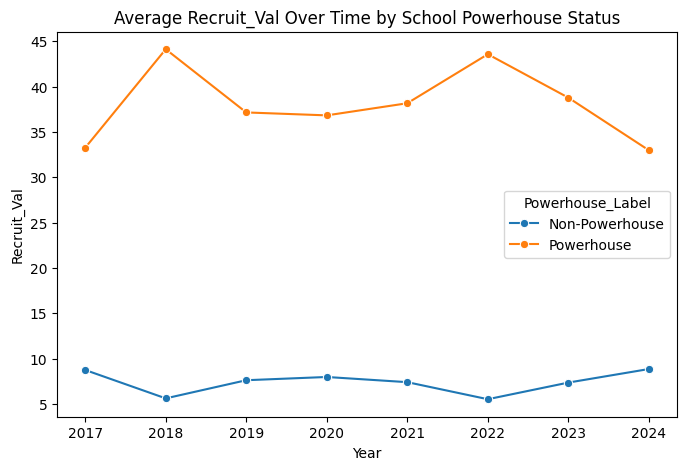

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

#############################################
# STEP 0: Data is assumed to be in df_power4
# with the columns described: 
# ['School','Year','Post_NIL','Powerhouse',
#  'Recruit_Val','Revenue','Coach_Pay','Conf', ...]
#############################################

# For demonstration, we assume df_power4 is loaded.

#############################################
# STEP 1: PARALLEL TRENDS (PRE-NIL PERIOD) #
#############################################
df_preNIL = df_power4[df_power4['Post_NIL'] == 0].copy()

# Regression: Recruit_Val ~ C(Year)*Powerhouse
formula_par_trends = "Recruit_Val ~ C(Year)*Powerhouse"
model_par_trends = smf.ols(formula=formula_par_trends, data=df_preNIL).fit(cov_type='HC3')
print("=== Parallel Trends (Pre-NIL) Regression ===")
print(model_par_trends.summary())

# Visualization
df_preNIL_avg = df_preNIL.groupby(['Year','Powerhouse'])['Recruit_Val'].mean().reset_index()
df_preNIL_avg['Powerhouse_Label'] = df_preNIL_avg['Powerhouse'].map({0:'Non-Powerhouse', 1:'Powerhouse'})

plt.figure(figsize=(8,5))
sns.lineplot(data=df_preNIL_avg, x='Year', y='Recruit_Val', hue='Powerhouse_Label', marker='o')
plt.title("Parallel Trends Check (Pre-NIL) - Average Recruit_Val")
plt.xlabel("Year")
plt.ylabel("Avg Recruit_Val")
plt.legend(title='School Type')
plt.show()

# Plot difference
df_diff = df_preNIL_avg.pivot(index='Year', columns='Powerhouse_Label', values='Recruit_Val')
df_diff['Diff'] = df_diff['Powerhouse'] - df_diff['Non-Powerhouse']
plt.figure(figsize=(8,4))
plt.plot(df_diff.index, df_diff['Diff'], marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.title("Difference (Powerhouse - Non-Powerhouse) in Recruit_Val (Pre-NIL)")
plt.xlabel("Year")
plt.ylabel("Difference in Mean Recruit_Val")
plt.show()


#############################################
# STEP 2: MAIN DID REGRESSION (FULL SAMPLE) #
#############################################
# We'll run: Recruit_Val ~ Post_NIL + Powerhouse + Post_NIL*Powerhouse + Revenue + Coach_Pay + FE
formula_did = (
    "Recruit_Val ~ Post_NIL + Powerhouse + Post_NIL:Powerhouse "
    "+ Revenue + Coach_Pay + C(School) + C(Year)"
)
did_model = smf.ols(formula=formula_did, data=df_power4).fit(cov_type='HC3')
print("=== Main DiD Regression ===")
print(did_model.summary())

# We can optionally store or print the regression table in a nicer format.


#############################################
# STEP 3: HHI CALCULATION OVER TIME         #
#############################################
# We'll treat Recruit_Val as the "market share" variable for each year.
# 1) For each year, sum total Recruit_Val
# 2) For each school, compute share = Recruit_Val / total_in_that_year
# 3) HHI = sum( share^2 )

hhi_results = []
for year in sorted(df_power4['Year'].unique()):
    df_year = df_power4[df_power4['Year'] == year]
    total_rv = df_year['Recruit_Val'].sum()
    # Avoid zero division
    if total_rv <= 0:
        hhi_val = np.nan
    else:
        shares = (df_year['Recruit_Val'] / total_rv)**2
        hhi_val = shares.sum()
    hhi_results.append((year, hhi_val))

df_hhi = pd.DataFrame(hhi_results, columns=['Year','HHI'])

# Plot HHI
plt.figure(figsize=(8,5))
plt.plot(df_hhi['Year'], df_hhi['HHI'], marker='o', label='HHI')
# Optionally, add thresholds (like 0.15 or 0.25) to interpret
plt.axhline(0.15, color='green', linestyle='--', label='0.15 threshold')
plt.axhline(0.25, color='red', linestyle='--', label='0.25 threshold')
plt.title("HHI of Recruit_Val by Year")
plt.xlabel("Year")
plt.ylabel("HHI (Herfindahl-Hirschman Index)")
plt.legend()
plt.show()

print("=== HHI by Year ===")
print(df_hhi)


#############################################
# STEP 4: AVERAGE RECRUIT_VAL Over Time (All)
#############################################
df_avg_rv = df_power4.groupby(['Year','Powerhouse'])['Recruit_Val'].mean().reset_index()
df_avg_rv['Powerhouse_Label'] = df_avg_rv['Powerhouse'].map({0:'Non-Powerhouse',1:'Powerhouse'})

plt.figure(figsize=(8,5))
sns.lineplot(data=df_avg_rv, x='Year', y='Recruit_Val', hue='Powerhouse_Label', marker='o')
plt.title("Average Recruit_Val Over Time by School Powerhouse Status")
plt.xlabel("Year")
plt.ylabel("Recruit_Val")
plt.show()



In [59]:
!pip install stargazer

In [64]:
# Get the HTML summary:
results_html = model_par_trends.summary().as_html()

# Save the HTML summary to a file:
with open("parllel_trends_results.html", "w") as f:
    f.write(results_html)
    
print("Regression results saved as parllel_trends_results.html")


Regression results saved as parllel_trends_results.html


In [63]:
# Get the HTML summary:
results_html = did_model.summary().as_html()

# Save the HTML summary to a file:
with open("diD_regression_results.html", "w") as f:
    f.write(results_html)
    
print("Regression results saved as diD_regression_results.html")


Regression results saved as diD_regression_results.html


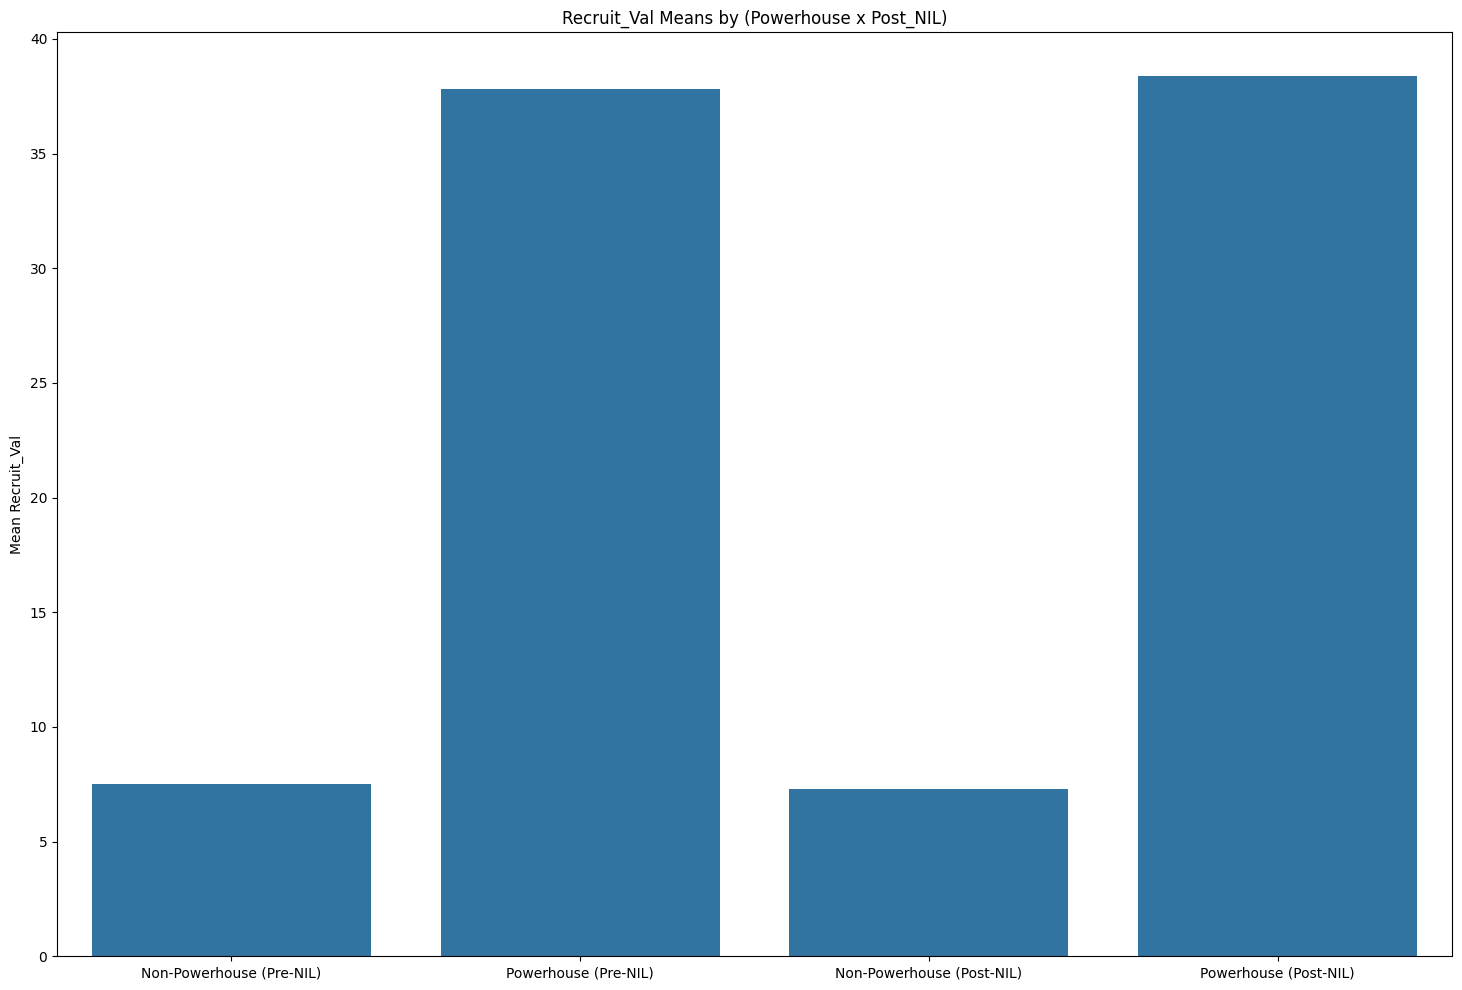

In [73]:
# 1. Group by Post_NIL and Powerhouse
did_means = (
    df_power4.groupby(['Post_NIL','Powerhouse'])['Recruit_Val']
    .mean()
    .reset_index()
)

did_means['Group'] = did_means.apply(
    lambda row: ("Powerhouse" if row['Powerhouse']==1 else "Non-Powerhouse")
               + (" (Post-NIL)" if row['Post_NIL']==1 else " (Pre-NIL)"),
    axis=1
)

# 2. Simple bar chart
plt.figure(figsize=(18,12))
sns.barplot(data=did_means, x='Group', y='Recruit_Val')
plt.title("Recruit_Val Means by (Powerhouse x Post_NIL)")
plt.ylabel("Mean Recruit_Val")
plt.xlabel("")
plt.show()


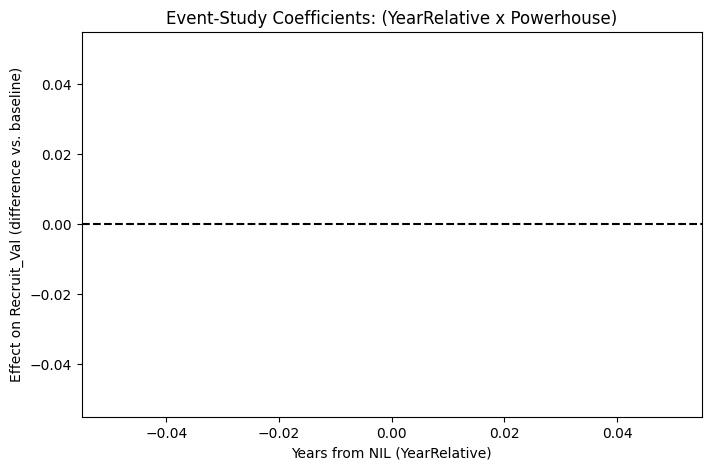

In [74]:
import re

coefs = model_event_study.params
conf_int = model_event_study.conf_int()

coefs_event = []
for param in coefs.index:
    # Look for something like C(YearRelative)[T.1]:Powerhouse
    match = re.match(r"C\(YearRelative\)\[T\.(.*)\]:Powerhouse", param)
    if match:
        yearrel = match.group(1)  # e.g. '1'
        beta = coefs[param]
        ci_low = conf_int.loc[param, 0]
        ci_high = conf_int.loc[param, 1]
        coefs_event.append((int(yearrel), beta, ci_low, ci_high))

coefs_event = sorted(coefs_event, key=lambda x: x[0])
df_event = pd.DataFrame(coefs_event, columns=['YearRel','Beta','CI_Low','CI_High'])

plt.figure(figsize=(8,5))
plt.axhline(0, color='black', linestyle='--')
plt.errorbar(df_event['YearRel'], df_event['Beta'], 
             yerr=[df_event['Beta']-df_event['CI_Low'], df_event['CI_High']-df_event['Beta']],
             fmt='o', capsize=3)
plt.title("Event-Study Coefficients: (YearRelative x Powerhouse)")
plt.xlabel("Years from NIL (YearRelative)")
plt.ylabel("Effect on Recruit_Val (difference vs. baseline)")
plt.show()


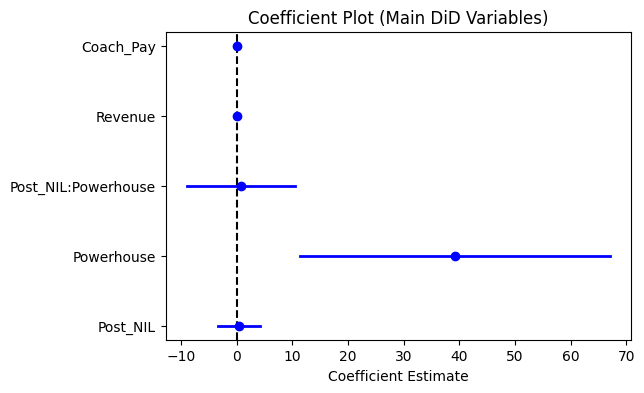

In [76]:
results = did_model  # Suppose this is your main DiD model

coef_df = pd.DataFrame({
    'param': results.params.index,
    'coef': results.params.values,
    'ci_lower': results.conf_int()[0],
    'ci_upper': results.conf_int()[1]
})

# Filter to the variables we care about
interesting_vars = ['Post_NIL', 'Powerhouse', 'Post_NIL:Powerhouse', 'Revenue', 'Coach_Pay']
coef_df = coef_df[coef_df['param'].isin(interesting_vars)]

# Plot
plt.figure(figsize=(6,4))
plt.axvline(0, color='black', linestyle='--')
for i, row in coef_df.iterrows():
    plt.plot([row['ci_lower'], row['ci_upper']], [i, i], color='blue', linewidth=2)
    plt.plot(row['coef'], i, 'o', color='blue')
plt.yticks(range(len(coef_df)), coef_df['param'])
plt.title("Coefficient Plot (Main DiD Variables)")
plt.xlabel("Coefficient Estimate")
plt.show()


Unique YearRelative categories: Index([-4, -3, -2, -1, 0, 1, 2, 3, 4], dtype='int64')
                            OLS Regression Results                            
Dep. Variable:            Recruit_Val   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     5.408
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           1.40e-20
Time:                        17:46:25   Log-Likelihood:                -1066.2
No. Observations:                 281   AIC:                             2256.
Df Residuals:                     219   BIC:                             2482.
Df Model:                          61                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 60
  warnings.warn('covariance of constraints does not have full '


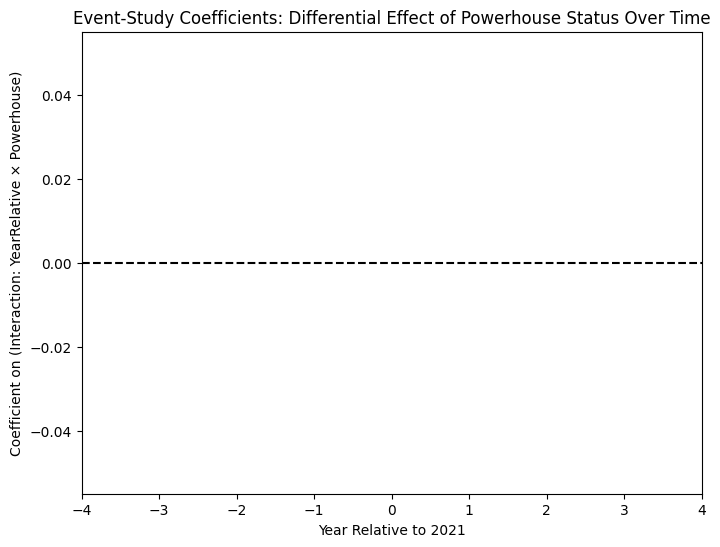

In [81]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import re

# ========= Prepare the YearRelative Variable =========
# Create a new variable for year relative to a chosen reference (e.g., 2021)
df_power4['YearRelative'] = (df_power4['Year'] - 2021).astype(int)

# Define the desired categories as integers (e.g., from -4 to 4)
desired_categories = list(range(-4, 5))  # This produces [-4, -3, -2, -1, 0, 1, 2, 3, 4]
# Convert YearRelative to a categorical variable with the desired ordering.
df_power4['YearRelative'] = pd.Categorical(df_power4['YearRelative'], categories=desired_categories, ordered=True)

# Check the unique categories to verify
print("Unique YearRelative categories:", df_power4['YearRelative'].cat.categories)

# ========= STEP 3: Dynamic / Event-Study DID =========
# The model below estimates the effect of Powerhouse status in each relative year,
# while controlling for school fixed effects (C(School)) and continuous controls.
formula_event_study = """
Recruit_Val ~ C(YearRelative) + C(YearRelative):Powerhouse + C(School) + Revenue + Coach_Pay
"""

# Run the OLS regression with heteroscedasticity-robust (HC3) standard errors.
model_event_study = smf.ols(formula_event_study, data=df_power4).fit(cov_type='HC3')
print(model_event_study.summary())

# ========= STEP 3b: Plot the Event-Study Coefficients =========
# Extract the coefficients for the interaction terms between YearRelative and Powerhouse.
coefs = model_event_study.params
conf_int = model_event_study.conf_int()
coefs_event = []

for param_name in coefs.index:
    # The interaction terms are labeled as "C(YearRelative)[T.<value>]:Powerhouse"
    match = re.match(r"C\(YearRelative\)\[T\.(-?\d+)\]:Powerhouse", param_name)
    if match:
        year_rel = int(match.group(1))
        beta = coefs[param_name]
        ci_lower = conf_int.loc[param_name, 0]
        ci_upper = conf_int.loc[param_name, 1]
        coefs_event.append((year_rel, beta, ci_lower, ci_upper))

# Sort the results by YearRelative
coefs_event.sort(key=lambda x: x[0])
df_event = pd.DataFrame(coefs_event, columns=['YearRelative', 'Beta', 'CI_Lower', 'CI_Upper'])

# Plot the event-study coefficients with error bars.
plt.figure(figsize=(8, 6))
plt.axhline(0, color='black', linestyle='--')
plt.errorbar(df_event['YearRelative'], df_event['Beta'],
             yerr=[df_event['Beta'] - df_event['CI_Lower'], df_event['CI_Upper'] - df_event['Beta']],
             fmt='o', capsize=4)
plt.title("Event-Study Coefficients: Differential Effect of Powerhouse Status Over Time")
plt.xlabel("Year Relative to 2021")
plt.ylabel("Coefficient on (Interaction: YearRelative × Powerhouse)")
plt.xticks(desired_categories)  # Ensure x-axis labels are whole numbers.
plt.show()


In [82]:
# Get the HTML summary:
results_html = model_event_study.summary().as_html()

# Save the HTML summary to a file:
with open("model_event_study.html", "w") as f:
    f.write(results_html)
    
print("Regression results saved as model_event_study.html")


Regression results saved as model_event_study.html
